In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_csv("../cleaned_csvs/Data_2016.csv")

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68220 entries, 0 to 68219
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           68220 non-null  int64  
 1   FL_DATE              68220 non-null  object 
 2   OP_UNIQUE_CARRIER    68220 non-null  object 
 3   ORIGIN               68220 non-null  object 
 4   ORIGIN_CITY_NAME     68220 non-null  object 
 5   DEST                 68220 non-null  object 
 6   DEST_CITY_NAME       68220 non-null  object 
 7   CRS_DEP_TIME         68220 non-null  int64  
 8   DEP_DELAY            67300 non-null  float64
 9   DEP_DELAY_NEW        67300 non-null  float64
 10  ARR_TIME             67243 non-null  float64
 11  ARR_DELAY            67134 non-null  float64
 12  ARR_DELAY_NEW        67134 non-null  float64
 13  CANCELLED            68220 non-null  float64
 14  CARRIER_DELAY        11356 non-null  float64
 15  WEATHER_DELAY        11356 non-null 

In [4]:
# Delete Unwated Columns

del data_df['Unnamed: 0']
del data_df['ORIGIN_CITY_NAME']
del data_df['DEST_CITY_NAME']
del data_df['ARR_TIME']
del data_df['DEP_DELAY']
del data_df['ARR_DELAY']
del data_df['ARR_DELAY_NEW']
del data_df['CRS_DEP_TIME']

data_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
0,2016-04-01,AA,DFW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
1,2016-04-02,AA,DFW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
2,2016-04-03,AA,DFW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
3,2016-04-04,AA,DFW,CLE,6.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
4,2016-04-05,AA,DFW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68215,2016-12-31,WN,MDW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
68216,2016-12-31,WN,MDW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
68217,2016-12-31,WN,MDW,CLE,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
68218,2016-12-31,WN,PHX,CLE,20.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12


In [5]:
# FLights Departing from Cleveland Airport "CLE"

dep_cle_df=data_df.loc[data_df["ORIGIN"] =="CLE"]
dep_cle_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month
30,2016-04-01,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
31,2016-04-02,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
32,2016-04-03,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
33,2016-04-04,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
34,2016-04-05,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68207,2016-12-31,WN,CLE,MDW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
68208,2016-12-31,WN,CLE,MDW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
68209,2016-12-31,WN,CLE,PHX,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12
68210,2016-12-31,WN,CLE,PHX,9.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,12


In [6]:
dep_cle_df['OP_UNIQUE_CARRIER'].unique()

array(['AA', 'B6', 'DL', 'EV', 'F9', 'NK', 'OO', 'UA', 'WN'], dtype=object)

In [7]:
# Add unique carrier name column
# create dict of unique_carrier codes to names
# map to unique_carrier column to transform values to strings
# carrier names were acquired from BTS statistics definitions

unique_carrier_dict = {'F9':'Frontier','DL':'Delta',
                       'NK':'Spirit','EV':'ExpressJet','OO':'SkyWest Airlines',
                       'UA':'United','AA':'American Airlines',
                       'B6':'JetBlue','WN':'Southwest Airlines'}

#map dict to unique_carrier column

dep_cle_df['unique_carrier_nm'] = dep_cle_df['OP_UNIQUE_CARRIER'].map(unique_carrier_dict)

#view final dataframe on flight origin and destination

dep_cle_df.head()

/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
30,2016-04-01,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4,American Airlines
31,2016-04-02,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4,American Airlines
32,2016-04-03,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4,American Airlines
33,2016-04-04,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4,American Airlines
34,2016-04-05,AA,CLE,DFW,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2016,4,American Airlines


In [8]:
# Clear NaNs

dep_clean_df = dep_cle_df.fillna(0)
dep_clean_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm
30,2016-04-01,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines
31,2016-04-02,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines
32,2016-04-03,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines
33,2016-04-04,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines
34,2016-04-05,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68207,2016-12-31,WN,CLE,MDW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines
68208,2016-12-31,WN,CLE,MDW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines
68209,2016-12-31,WN,CLE,PHX,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines
68210,2016-12-31,WN,CLE,PHX,9.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,12,Southwest Airlines


In [9]:
fligh_per_carrier_df = dep_clean_df.groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Number of flights per Carrier')
fligh_per_carrier_df

,Airline,Number of flights per Carrier
0,American Airlines,2424
1,Delta,2846
2,ExpressJet,9972
3,Frontier,2835
4,JetBlue,1279
5,SkyWest Airlines,873
6,Southwest Airlines,5388
7,Spirit,2840
8,United,5654


<function matplotlib.pyplot.show(*args, **kw)>

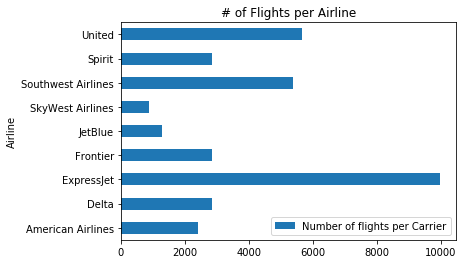

In [10]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('# of Flights per Airline - 2016.jpg',bbox_inches='tight', dpi=150)
plt.show

In [11]:
# Create a column with Ontime, Late Cancelled status

dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW <= 15, "Flight Status"]="OnTime"
dep_clean_df.loc[dep_clean_df.DEP_DELAY_NEW > 15, "Flight Status"]="Late"
dep_clean_df.loc[dep_clean_df.CANCELLED == 1, "Flight Status"]="Cancelled"
dep_clean_df.head()

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
30,2016-04-01,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines,OnTime
31,2016-04-02,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines,OnTime
32,2016-04-03,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines,OnTime
33,2016-04-04,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines,OnTime
34,2016-04-05,AA,CLE,DFW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,American Airlines,OnTime


In [12]:
# Count Flight Status

flightstatus_df = dep_clean_df.groupby('Flight Status')['Flight Status'].count()
flightstatus_df

Flight Status
Cancelled      485
Late          5129
OnTime       28497
Name: Flight Status, dtype: int64

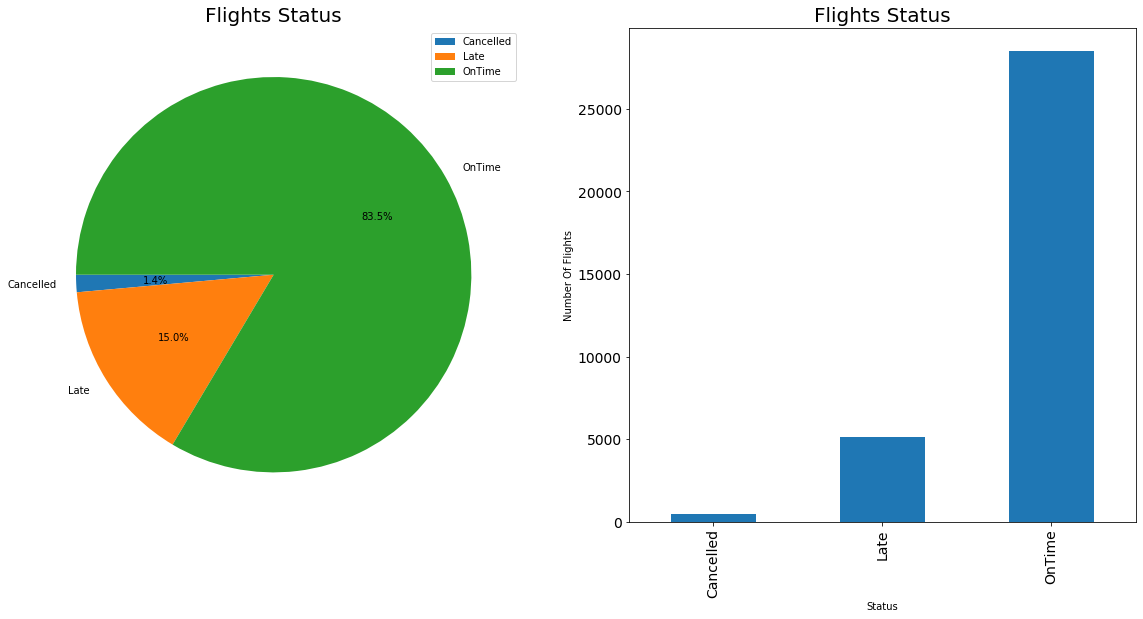

In [13]:
# Plot FLight Status

fig = plt.figure(figsize=[20, 20])
ax = fig.add_subplot(221)
ax.pie(flightstatus_df, labels=flightstatus_df.index, startangle=180, autopct='%1.1f%%')
ax.set_title("Flights Status", fontsize=20);
plt.gcf().gca()
plt.legend()

ax2 = fig.add_subplot(222)
ax2.set_title("Flights Status", fontsize=20);
ax2.set_facecolor('white')
flightstatus_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=14)
plt.xlabel('Status')
plt.ylabel('Number Of Flights')
plt.savefig('flight status - 2016.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [14]:
# Flitering flights by delays > 15 min

delays_df = dep_clean_df.loc[dep_clean_df['DEP_DELAY_NEW'] > 15]
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DELAY_NEW,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,year,month,unique_carrier_nm,Flight Status
89,2016-04-03,DL,CLE,ATL,108.0,0.0,45.0,0.0,0.0,0.0,44.0,2016,4,Delta,Late
158,2016-04-22,DL,CLE,ATL,16.0,0.0,0.0,0.0,3.0,0.0,16.0,2016,4,Delta,Late
349,2016-04-11,EV,CLE,LGA,35.0,0.0,33.0,0.0,0.0,0.0,0.0,2016,4,ExpressJet,Late
356,2016-04-12,EV,CLE,LGA,197.0,0.0,197.0,0.0,36.0,0.0,0.0,2016,4,ExpressJet,Late
359,2016-04-14,EV,CLE,LGA,28.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4,ExpressJet,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68118,2016-12-20,WN,CLE,PHX,39.0,0.0,2.0,0.0,0.0,0.0,23.0,2016,12,Southwest Airlines,Late
68152,2016-12-27,WN,CLE,MDW,104.0,0.0,0.0,0.0,0.0,0.0,96.0,2016,12,Southwest Airlines,Late
68169,2016-12-28,WN,CLE,BNA,55.0,0.0,0.0,0.0,0.0,22.0,0.0,2016,12,Southwest Airlines,Late
68182,2016-12-28,WN,CLE,MDW,30.0,0.0,0.0,0.0,0.0,0.0,17.0,2016,12,Southwest Airlines,Late


In [15]:
# Grouping delayed flights by carrier

groupby_df = delays_df.groupby(['unique_carrier_nm'])['DEP_DELAY_NEW'].count()
groupby_df

unique_carrier_nm
American Airlines      262
Delta                  321
ExpressJet            1640
Frontier               504
JetBlue                225
SkyWest Airlines       139
Southwest Airlines     656
Spirit                 746
United                 649
Name: DEP_DELAY_NEW, dtype: int64

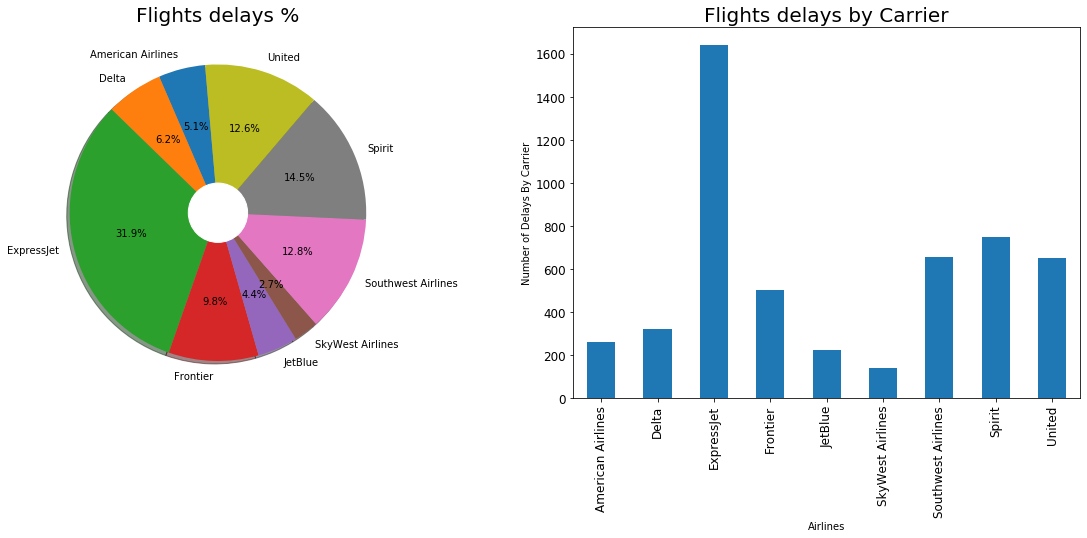

In [16]:
# Plot Delayed flights by carrier

fig = plt.figure(figsize=[20, 15])
ax = fig.add_subplot(221)
ax.pie(groupby_df, labeldistance=1.1, labels=groupby_df.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights delays %", fontsize=20);
plt.gcf().gca().add_artist(plt.Circle( (0,0), 0.2, color='white'))

ax2 = fig.add_subplot(222)
ax2.set_title("Flights delays by Carrier", fontsize=20);
ax2.set_facecolor('white')
groupby_df.plot(kind='bar', ax=ax2,  legend=False, fontsize=12)
plt.xlabel('Airlines')
plt.ylabel('Number of Delays By Carrier')
plt.savefig('Flights delays by Carrier - 2016.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [17]:
# Filter Delays by category

# Carrier Delays

delays_df[delays_df['CARRIER_DELAY'] > 15]['CARRIER_DELAY'].count()

1365

In [18]:
carrier_delays_df = delays_df.loc[delays_df['CARRIER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Carrier Delays')
carrier_delays_df

,Airline,Carrier Delays
0,American Airlines,72
1,Delta,112
2,ExpressJet,560
3,Frontier,150
4,JetBlue,61
5,SkyWest Airlines,24
6,Southwest Airlines,102
7,Spirit,117
8,United,167


In [19]:
# Weather Delays

delays_df[delays_df['WEATHER_DELAY'] > 15]['WEATHER_DELAY'].count()

91

In [20]:
weather_delays_df = delays_df.loc[delays_df['WEATHER_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Weather Delays')
weather_delays_df

,Airline,Weather Delays
0,American Airlines,4
1,Delta,9
2,ExpressJet,13
3,Frontier,2
4,JetBlue,3
5,SkyWest Airlines,3
6,Southwest Airlines,32
7,Spirit,11
8,United,14


In [21]:
# NAS Delays

delays_df[delays_df['NAS_DELAY'] > 15]['NAS_DELAY'].count()

1295

In [22]:
nas_delays_df = delays_df.loc[delays_df['NAS_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='NAS Delays')
nas_delays_df

,Airline,NAS Delays
0,American Airlines,25
1,Delta,29
2,ExpressJet,469
3,Frontier,128
4,JetBlue,29
5,SkyWest Airlines,19
6,Southwest Airlines,63
7,Spirit,350
8,United,183


In [23]:
# Security Delays

delays_df[delays_df['SECURITY_DELAY'] > 15]['SECURITY_DELAY'].count()

2

In [24]:
security_delays_df = delays_df.loc[delays_df['SECURITY_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Security Delays')
security_delays_df

,Airline,Security Delays
0,Southwest Airlines,1
1,Spirit,1


In [25]:
#Late Aircraft Delays

delays_df[delays_df['LATE_AIRCRAFT_DELAY'] > 15]['LATE_AIRCRAFT_DELAY'].count()

1763

In [26]:
late_aircaft_df = delays_df.loc[delays_df['LATE_AIRCRAFT_DELAY'] > 15].groupby('unique_carrier_nm')['unique_carrier_nm'].count().rename_axis('Airline').reset_index(name='Late Aircraft Delays')
late_aircaft_df

,Airline,Late Aircraft Delays
0,American Airlines,123
1,Delta,89
2,ExpressJet,481
3,Frontier,208
4,JetBlue,98
5,SkyWest Airlines,79
6,Southwest Airlines,315
7,Spirit,183
8,United,187


In [27]:
# Merge Delays per Category

merge = pd.merge(carrier_delays_df, weather_delays_df)
merge2 = pd.merge(merge, nas_delays_df)
merge3 =pd.merge(merge2, late_aircaft_df)
merge4 = pd.merge(merge3, security_delays_df, how='outer')
delays_category = merge4.fillna(0)
delays_category

,Airline,Carrier Delays,Weather Delays,NAS Delays,Late Aircraft Delays,Security Delays
0,American Airlines,72,4,25,123,0.0
1,Delta,112,9,29,89,0.0
2,ExpressJet,560,13,469,481,0.0
3,Frontier,150,2,128,208,0.0
4,JetBlue,61,3,29,98,0.0
5,SkyWest Airlines,24,3,19,79,0.0
6,Southwest Airlines,102,32,63,315,1.0
7,Spirit,117,11,350,183,1.0
8,United,167,14,183,187,0.0


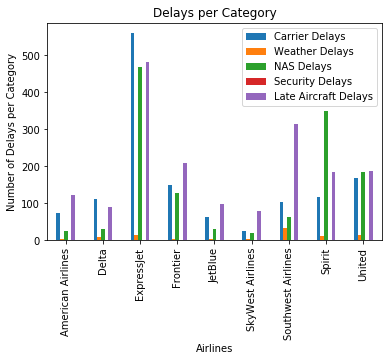

In [28]:
# Plot Delays by category

delays_category.plot(x="Airline", y=["Carrier Delays", "Weather Delays", "NAS Delays", "Security Delays", "Late Aircraft Delays"], kind="bar")
plt.xlabel('Airlines')
plt.ylabel('Number of Delays per Category')
plt.title('Delays per Category')
plt.savefig('Delays per category - 2016.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [29]:
# Flights By Month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

monthly_flights_df = dep_clean_df.groupby(['month'])['month'].count()
monthly_flights_df


/Users/diegogonzalez/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


month
1     2680
2     2600
3     2812
4     2790
5     2899
6     3068
7     3102
8     3097
9     2902
10    2938
11    2624
12    2599
Name: month, dtype: int64

In [30]:
# Delays by month

delays_df.loc[:, 'month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                  ['01-Jan', '02-Feb', '03-March', '04-Apr', '05-May', '06-Jun',
                                  '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
                                  inplace=True)

month_delay = delays_df.groupby(['month'])['DEP_DELAY_NEW'].count()
month_delay

month
01-Jan      371
02-Feb      404
03-March    392
04-Apr      313
05-May      373
06-Jun      507
07-Jul      634
08-Aug      547
09-Sep      380
10-Oct      383
11-Nov      366
12-Dec      472
Name: DEP_DELAY_NEW, dtype: int64

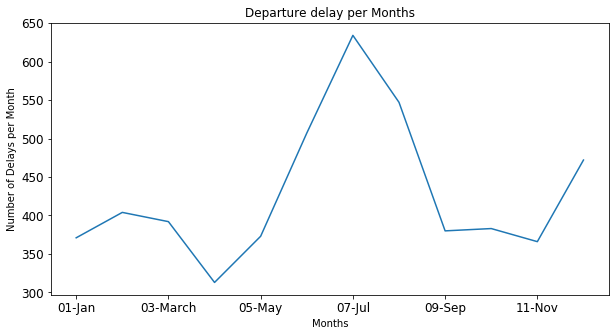

In [31]:
month_delay.plot(figsize=[10,5], title ="Departure delay per Months",  legend=False, fontsize=12)
plt.gca().set_facecolor('white')
plt.xlabel('Months')
plt.ylabel('Number of Delays per Month')
plt.savefig('Number of Delays per Month - 2016.jpg',bbox_inches='tight', dpi=150)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

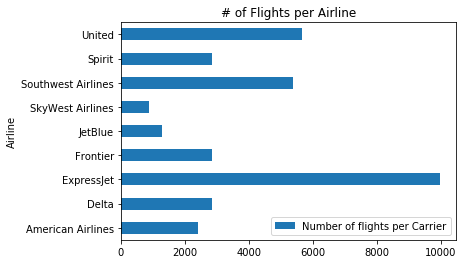

In [32]:
# plot number of flights per carrier

fligh_per_carrier_df.plot.barh(x='Airline', y='Number of flights per Carrier',
                               title="# of Flights per Airline");

plt.savefig('# of Flights per Airline - 2016.jpg',bbox_inches='tight', dpi=150)
plt.show